<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/13_Logistic_Regression_%26_ROC_Curve_Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression and Receiver Operating Characteristic (ROC) Curve**

Logistic regression is named after the function used in this model, the logistic function.

The logistic function, also called the sigmoid function was initially developed to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. 

It’s an S-shaped curve that can take any real-valued number and maps it into a value between 0 and 1, but never at the limits.

Logistic regression outputs probabilities. For binary classifiers, the data is labeled ‘1’ if the value of the probability ‘p’ is greater than 0.5. And, the data is labeled ‘0’, when the probability ‘p’ is less than 0.5. By default, logistic regression threshold = 0.5

**Pima Indians Diabetes Database**

Pima Indians Diabetes dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 

In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset is imported from Kaggle.

https://www.kaggle.com/uciml/pima-indians-diabetes-database

Installing Kaggle Package to access the diabetes dataset from Kaggle.

In [49]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [50]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Protect Kaggle JSON file for security reasons

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Import the diabetes dataset

In [53]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [54]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the diabetes dataset into a DataFrame: df
df = pd.read_csv('pima-indians-diabetes-database.zip', compression='zip', header=0, sep=',', quotechar='"')
print(df)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [0]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
# Import necessary modules
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [0]:
# Create the classifier: logreg 
# Added the solver to address the warning thrown by the code
logreg = LogisticRegression()

In [0]:
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

In [0]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [62]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



**The Receiver Operating Characteristic (ROC) Curve**

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. 

The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

In [0]:
# Import necessary modules
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [0]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [0]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

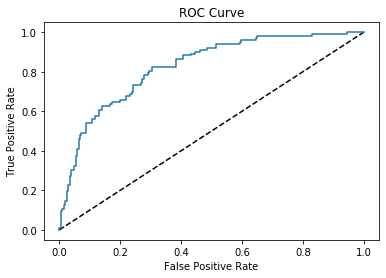

In [66]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()